# **Install MMDetection and Related Libraries**

In [1]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!pip install -U torch==1.7.1+cu110 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1156.8 MB 11 kB/s 
     |████████████████████████████████| 12.8 MB 41.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.1
    Uninstalling torchvision-0.8.1:
      Successfully uninstalled torchvision-0.8.1
     |████████████████████████████████| 605 kB 4.1 MB/s 
     |████████████████████████████████| 190 kB 50.3 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.7.1-cp37-cp37m-linux_x86_64.whl size=34404463 sha256=c67d0b38bc73ec982f1e854a98415f7130ae44c73578a7675ae9feac85e05456
  Stored in directory: /root/.cache/pip/wheels/27/d5/67/e59eb8b14401d1ac087a8a03641951cb4e32d09a23c62b7265
Successfully built mmcv-full
Cloning into 'mmdetection'...
remote: Enumerating objects: 34383, done.


In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.7.1+cu110 True
2.28.2
11.0
GCC 7.5


/opt/conda/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [4]:
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/hrnet/cascade_rcnn_hrnetv2p_w32_20e_coco/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth \
      -O checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth

--2023-03-11 05:08:49--  https://download.openmmlab.com/mmdetection/v2.0/hrnet/cascade_rcnn_hrnetv2p_w32_20e_coco/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.24.214, 47.246.24.209, 47.246.24.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.24.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300246890 (286M) [application/octet-stream]
Saving to: ‘checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth’

checkpoints/cascade 100%[===================>] 286.34M  24.2MB/s    in 11s     

2023-03-11 05:09:01 (25.4 MB/s) - ‘checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth’ saved [300246890/300246890]



# **Test MMDetection**

In [5]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
config = 'configs/hrnet/cascade_rcnn_hrnetv2p_w32_20e_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

load checkpoint from local path: checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth


In [6]:
img = './demo/demo.jpg'
result = inference_detector(model, img)

/kaggle/working/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


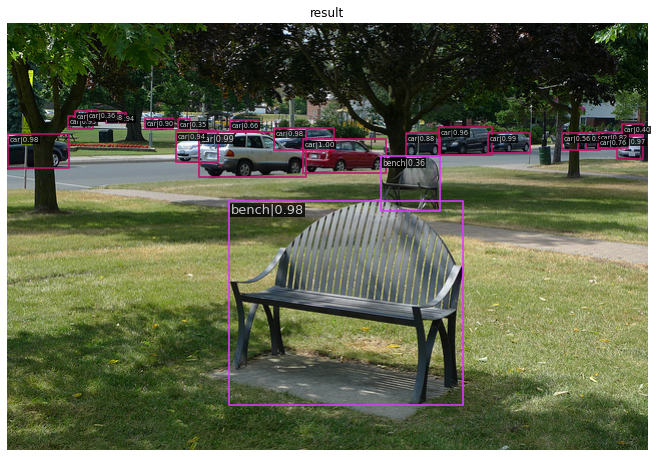

In [7]:
show_result_pyplot(model, img, result, score_thr=0.3)

# **Downloading RetinaNet Checkpoint**

In [ ]:
os.listdir('./mmdetection/checkpoints')

In [ ]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/guided_anchoring/ga_retinanet_r50_caffe_fpn_1x_coco/ga_retinanet_r50_caffe_fpn_1x_coco_20201020-39581c6f.pth \
      -O /kaggle/working/mmdetection/checkpoints/ga_retinanet_r50_caffe_fpn_1x_coco_20201020-39581c6f.pth

In [ ]:
from mmcv import Config
cfg = Config.fromfile('/kaggle/working/mmdetection/configs/hrnet/cascade_rcnn_hrnetv2p_w32_20e_coco.py')

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'CocoDataset'
cfg.classes = 'labels.txt'
cfg.data_root = '/kaggle/input/citypersons'
# cfg.model.bbox_head.num_classes = 1
cfg.model.roi_head.bbox_head[0].num_classes = 1
cfg.model.roi_head.bbox_head[1].num_classes = 1
cfg.model.roi_head.bbox_head[2].num_classes = 1
cfg.data.test.type = 'CocoDataset'
cfg.data.test.classes = 'labels.txt'
cfg.data.test.data_root = '/kaggle/input/citypersons'
cfg.data.test.ann_file = '/kaggle/input/coco-labels-3/val_gt.json'
cfg.data.test.img_prefix = '/kaggle/input/citypersons/val'
cfg.data.train.type = 'CocoDataset'
cfg.data.train.data_root = '/kaggle/input/citypersons'
cfg.data.train.ann_file = '/kaggle/input/coco-labels-3/train_gt.json'
cfg.data.train.img_prefix = '/kaggle/input/citypersons/train'
cfg.data.train.classes = 'labels.txt'
cfg.data.val.type = 'CocoDataset'
cfg.data.val.data_root = '/kaggle/input/citypersons'
cfg.data.val.ann_file = '/kaggle/input/coco-labels-3/val_gt.json'
cfg.data.val.img_prefix = '/kaggle/input/citypersons/val'
cfg.data.val.classes = 'labels.txt'

# modify num classes of the model in box head
# cfg.model.roi_head.bbox_head.num_classes = 1
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '/kaggle/working/mmdetection/checkpoints/cascade_rcnn_hrnetv2p_w32_20e_coco_20200208-928455a4.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.01 / 8
cfg.optimizer_config.grad_clip = dict(max_norm=35, norm_type=2)
# cfg.lr_config.warmup = None
# cfg.lr_config.policy = 'cyclic'
# cfg.log_config.interval = 10
cfg.lr_config.policy = 'step'
cfg.lr_config.step = 7
cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 2
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12
cfg.runner.max_epochs = 48
cfg.log_config.interval = 100

cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = 'cuda'

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

# **Config File**

# **Train RetinaNet**

In [ ]:
datasets = [build_dataset(cfg.data.train)]
model = build_detector(
 cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

# **Visualized Predictions with RetinaNet**

In [ ]:
results = []
# model = init_detector(cfg, 'epoch_48.pth')
items = os.listdir("/kaggle/input/citypersons/val/")
for item in items:
    img = mmcv.imread("/kaggle/input/citypersons/val/"+item)
    result = inference_detector(model, img)
    results.append(result)
    show_result_pyplot(model, img, result)